# Fourier Transformation

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('rn.jpg', 0)
img_dft = cv.dft(np.float32(img), flags = cv.DFT_COMPLEX_OUTPUT)
img_dft_shift = np.fft.fftshift(img_dft)
magnitude_spectrum = 20 * np.log(cv.magnitude(img_dft_shift[:,:,0], img_dft_shift[:,:,1]))

### Low pass filter

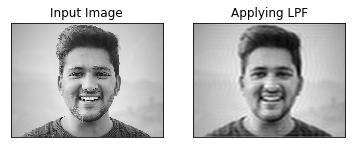

In [5]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Create a mask first, center square 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30 : crow + 30, ccol - 30 : ccol + 30] = 1

# Apply mask and inverse DFT
fshift = img_dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Applying LPF'), plt.xticks([]), plt.yticks([])

plt.show()                


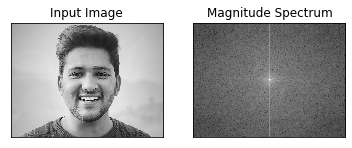

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('rn.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         
